In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("crypto_data.csv")
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Discard all cryptocurrencies that are not being traded.

trading_df = df[df["IsTrading"]==True]
trading_df = trading_df.drop(columns={"IsTrading"})
trading_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
# Remove all rows that have at least one null value.
trading_df1 = trading_df.dropna()
trading_df1

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Filter for cryptocurrencies that have been mined.

trading_df2 = trading_df1[trading_df1["TotalCoinsMined"]>0]
trading_df2 = trading_df2.drop(columns={"CoinName"})
trading_df2

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [6]:
# convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data

trading_df_dummies = pd.get_dummies(trading_df2)
trading_df_dummies

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#  Standardize your dataset
from sklearn.preprocessing import StandardScaler

scaled_df = StandardScaler().fit_transform(trading_df_dummies)
scaled_df

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, 23.04343724, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [8]:
# Perform dimensionality reduction with PCA.

from sklearn.decomposition import PCA

pca = PCA(n_components=.90)
data_pca = pca.fit_transform(scaled_df)
len(data_pca)

532

In [9]:
pca_df = pd.DataFrame(data=data_pca)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,-1.306501e-14,-5.621622e-16,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,8.863643e-228,1.467102e-17,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-0.286779,-0.135378,-7.626259e-15,-2.244923e-15,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,4.402703e-16,2.827645e-15,-2.819287e-15,-1.728393e-15,1.128723e-15,2.984690e-15,-9.892902e-16,4.919175e-15,-3.978698e-16,3.658273e-15
2,0.361159,-0.003304,-3.829767e-15,1.128927e-16,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,-2.004350e-15,1.399760e-15,3.119400e-15,-1.106410e-15,-6.772764e-16,-1.140682e-15,2.097976e-15,6.473373e-15,2.240117e-15,-2.781416e-15
3,-0.287881,-0.256431,-2.846747e-14,-2.941218e-15,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-2.103320e-02,6.708200e-01,8.495723e-01,1.049212e+00,2.093828e-01,5.856396e-01,-2.963682e-01,5.895424e-01,-3.636091e-01,4.341479e-01
4,-0.136884,-0.256819,-3.358477e-14,-4.627349e-15,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,-1.017018e+00,4.656191e-01,-4.707236e-02,-2.591657e-02,4.854765e-01,2.323707e+00,2.221618e-01,-6.782951e-01,1.651385e+00,-7.142324e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.986464,-0.234495,-4.489138e-14,-1.825387e-15,-1.054757,-0.022428,0.022512,-0.350649,1.203274,0.152063,...,-1.601971e-14,7.112751e-14,2.499075e-14,-1.601971e-16,-7.609362e-15,-1.345656e-14,4.841957e-14,2.643252e-15,1.810227e-14,-1.754158e-14
528,-0.311155,-0.186258,-1.791518e-14,-4.181474e-15,0.022867,0.849673,-0.274454,0.163274,-1.779116,-0.495436,...,-1.369615e+00,9.353990e-01,7.223558e-02,-5.329141e-01,-1.591799e+00,5.058986e-01,2.608798e+00,2.638154e+00,2.723740e+00,-1.998843e+00
529,-0.076558,-0.359258,-4.013182e-14,-1.280921e-15,-0.077205,-3.531071,0.473749,0.020852,0.383523,0.177536,...,1.061306e-15,-1.922365e-15,-2.883548e-15,-1.021256e-15,-1.168938e-15,2.402956e-16,2.623227e-15,-1.439271e-15,2.695817e-15,1.331638e-15
530,-0.333347,-0.283921,-2.745440e-14,9.244420e-15,0.011813,-2.475848,0.283016,-0.068158,0.528642,0.314484,...,1.496235e+00,7.166624e-01,5.738194e-01,2.512913e+00,2.528034e+00,-3.531057e-01,-1.806972e-01,-2.748067e+00,-1.631682e+00,-1.353561e+00


In [10]:
# further reduce the dataset dimensions with t-SNE and visually inspect the results

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(pca_df)

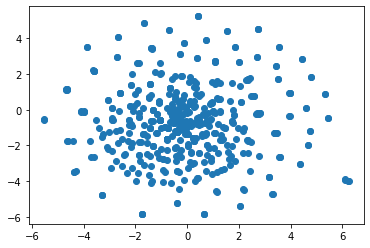

In [11]:
# create a scatter plot of the t-SNE output

pca_df['x'] = tsne_features[:,0]
pca_df['y'] = tsne_features[:,1]
plt.scatter(pca_df['x'],pca_df['y'])
plt.show()

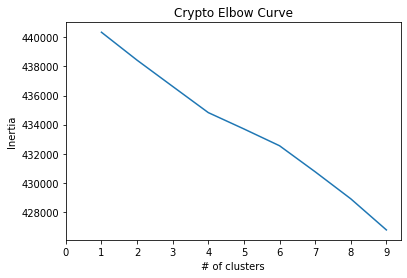

In [14]:
# Create an elbow plot to identify the best number of clusters

from sklearn.cluster import KMeans

inertia = []
k = list(range(1,10))

for x in k:
    km = KMeans(n_clusters=x, random_state = 0)
    km.fit(pca_df)
    inertia.append(km.inertia_)
    
elbow_data = {"k" : k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(list(range(10)))
plt.title("Crypto Elbow Curve")
plt.xlabel("# of clusters")
plt.ylabel("Inertia")
plt.show()

In [13]:
# RECOMMENDATION

#From the elbow graph, we can see that as the data is slpit 
# into more and mroe clusters, the inertia diminishes. By this 
# conclusion, I would recommend that the data not be split into 
# clusters to optimize it.